# Scientific Python

This notebook will provide a basic introduction to some common Python packages commonly used in scientific and engineering related Python.


## Part 0: Jupyter Notebook Basics

The environment we are running in is called a [Jupyter Notebook](https://jupyter.org/). This is an interactive Python environment that allows quick editing and running of Python code from a browser. Let's start with a quick intro to working with a Jupyter Notebook.

To start, let's import the packages we'll be using to our Python workspace. Select the code cell below and press the run button or type "Shift + enter" to run it.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

print("Import done!")

Import done!


In a Jupyter notebook like this one, all of the code cells are run in the same interactive workspace. This means that we can use variables defined by running one code cell in any other code cell. Note that the order you run cells in does matter! If your workspace gets closed, you can use the menu option Runtime->Run all to quickly rerun all the cells in the workspace.

Let's try this out by fetching the versions of the packages we just imported. Note that when you run this code cell, the output will get printed underneath the cell.

In [36]:
print("Numpy version:", np.__version__)
print("OpenCV version:", cv2.__version__)

Numpy version: 1.18.5
OpenCV version: 4.1.2


Functions can also be defined and reused across cells. Let's define a test function by running the cell below.

In [5]:
def add(a, b):
  return a + b

Now, we can some code that uses the function to add some numbers in this cell.

In [6]:
var1 = 24
var2 = 73

var_sum = add(var1, var2)

print("The sum of", var1, "and", var2, "is:", var_sum)

The sum of 24 and 73 is: 97


## Part 1: NumPy

[NumPy](https://numpy.org/) is the fundamental package for scientific Python. It defines a set of highly-optimized multi-dimensional array types that can be used to quickly perform operations on large data sets. The full documentation for NumPy can be found at https://numpy.org/doc/stable/reference/index.html. I highly recommend bookmarking that link if you plan on working with Python in the future.

### 1.1 The ndarray
The basic class of NumPy is the [ndarray](https://numpy.org/doc/stable/reference/arrays.ndarray.html). As the name suggests, it represents a n-dimensional array type. At first glance, it behaves very similarly to the regular Python lists you may be familiar with. Indeed, you can create an ndarray from an existing Python list using the `array` function.

In [7]:
arr = np.array([1,2,3])
print("1-d array:", arr)

arr2 = np.array([[1, 2], [3, 4], [5,6]])
print("2-d array:", arr2)

1-d array: [1 2 3]
2-d array: [[1 2]
 [3 4]
 [5 6]]


Note that since these are multidimensional arrays, simplying calling `len()` doesn't quite work as well. Usually you will be using the `size` parameter, which gives the total number of elements, and the `shape` parameter, which gives a tuple containing the size of the array in each dimension in order.

In [8]:
print(arr, "has size", arr.size, "and shape", arr.shape)
print(arr2, "has size", arr2.size, "and shape", arr2.shape)

[1 2 3] has size 3 and shape (3,)
[[1 2]
 [3 4]
 [5 6]] has size 6 and shape (3, 2)


The first major difference between ndarrays and Python lists is that ndarrays are homogeneous, in other words, they can only contain one type of data. You can inspect the data type using the `dtype` property. In addition, you can specify the dtype when creating a ndarray if you want a specific type.

In [9]:
float_arr = np.array([1.0, 2.0, 3.0])
print(float_arr.dtype, float_arr)

arr = np.array([1,2,3])
print(arr.dtype, arr)

float64 [1. 2. 3.]
int64 [1 2 3]


The next difference is that `ndarrays` are designed to have a fixed size. For regular Python lists, you can use `append()` to easily tack on new elements to an existing list. While numpy does have a `concatenate` function to join ndarrays, this works by creating a new larger array and copying in the data and so it is far less efficient.

This also means that creating a blank ndarray requires giving the size as a tuple. Numpy provides a few options for creating blank arrays.

In [10]:
print("Uninitialized array", np.empty((2,3)))
print("All zeros", np.zeros((2,3)))
print("All ones", np.ones((2,3)))

Uninitialized array [[3.99556817e-316 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]]
All zeros [[0. 0. 0.]
 [0. 0. 0.]]
All ones [[1. 1. 1.]
 [1. 1. 1.]]


So why go through all this trouble? The special feature of ndarrays and the reason why they are used so often is that they support efficient vectorized operations. Instead of writing a for loop to go over elements one by one, you can often perform operations over the whole ndarray at once. And since the ndarray knows the size and data type ahead of time, it can do this very efficiently and much faster than a for loop.

In [11]:
arr = np.array([1, 2, 3 ,4, 5])
print("Doubled", arr * 2)
print("Add 1", arr + 1)
print("Compare", arr > 2)
print("Exponents", arr ** 2)

Doubled [ 2  4  6  8 10]
Add 1 [2 3 4 5 6]
Compare [False False  True  True  True]
Exponents [ 1  4  9 16 25]


You can also do element-wise operations on ndarrays of the same size.


In [12]:
# Create array of 2's in same shape as arr
arr2 = np.ones(arr.shape) * 2
print(arr2)

print("Do math", (arr - arr2) * arr)
print("Do comparisons", arr > arr2)
print("Do harder math", np.log(np.pi / arr))
print("Prove trig identities", np.cos(arr) ** 2 + np.sin(arr) ** 2)

[2. 2. 2. 2. 2.]
Do math [-1.  0.  3.  8. 15.]
Do comparisons [False False  True  True  True]
Do harder math [ 1.14472989  0.45158271  0.0461176  -0.24156448 -0.46470803]
Prove trig identities [1. 1. 1. 1. 1.]


#### Exercise
Numpy also provides a bunch of convenient functions to do common math operations. For instance, `mean()` finds the mean of an array. Let's do a race against regular Python lists to see how it performs!

In [13]:
def list_mean(input):
  # Write code to find the average of the contents of the input list
  return sum(input) / len(input)

In [14]:
# Make a big list
python_list = list(range(1000000))
numpy_array = np.array(list(range(1000000)))
average = 0

import time
start_time = time.time()
average = list_mean(python_list)
end_time = time.time()
print(average)
print("Python list took", end_time - start_time, "seconds")

average = 0
start_time = time.time()
average = numpy_array.mean()
end_time = time.time()
print(average)
print("Numpy ndarray took", end_time - start_time, "seconds")

499999.5
Python list took 0.0055315494537353516 seconds
499999.5
Numpy ndarray took 0.0028007030487060547 seconds


The [ndarray documentation](https://numpy.org/doc/stable/reference/arrays.ndarray.html#calculation) lists out all the available operations. Some other useful ones are `sum()`, `min()`, `max()`, and `std()` (standard deviation).

### 1.2 Array Slicing
The next key feature of NumPy arrays is that they can be efficiently "sliced" using an extended version of the standard Python square bracket notation. This lets you quickly extract specific dimensions or sections of an array in a single step.

For regular Python lists, you can specify a slice using the notation `[begin:end]`. This also applies to ndarrays, except you can specify a different range for each dimension. Note that the beginning index is inclusive, while the end index is exclusive.

In [15]:
arr = np.array([[0, 1,2,3,4,5],[6, 7,8,9,10,11],[12, 13,14,15,16,17]])

# Select first row
print(arr[0])

# Select portion of the first row
print(arr[0,0:4])

# Select first two columns of first two rows
print(arr[0:2, 0:2])

[0 1 2 3 4 5]
[0 1 2 3]
[[0 1]
 [6 7]]


You can ommit parts of a slice and Python will extend the slice to the end of the array in the missing direction.

In [16]:
arr1 = np.array([0,1,2,3,4,5,6])

# Select everything after index 2
print(arr1[2:])

# Select everything before index 2
print(arr1[:2])

# Select everything
print(arr1[:])
# This is very useful in multidimensional arrays. Ex. select the first column of arr
print(arr[:, 0])

[2 3 4 5 6]
[0 1]
[0 1 2 3 4 5 6]
[ 0  6 12]


Python also permits negative indices, which are interpreted as counting back from the end of the array.

In [17]:
print(arr)

# Select the last row
print(arr[-1])

# Select the last column
print(arr[:, -1])

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]]
[12 13 14 15 16 17]
[ 5 11 17]


Finally, you can add in a step parameter like `[begin:end:step]` to select every `step` element. The step can also be negative, in which case the array will be indexed starting from the end.

In [18]:
print(arr)

# Select even index columns
print(arr[0:3, 0:6:2])

# Select odd index columns
print(arr[:, 1::2])

# Select odd columns of even rows
print(arr[::2, 1::2])

# Select first row
print(arr[0])
# Reverse first row
print(arr[0, ::-1])

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]]
[[ 0  2  4]
 [ 6  8 10]
 [12 14 16]]
[[ 1  3  5]
 [ 7  9 11]
 [13 15 17]]
[[ 1  3  5]
 [13 15 17]]
[0 1 2 3 4 5]
[5 4 3 2 1 0]


#### Exercise
To practice, try writing a function that flips an 2d array using only slicing notation.

In [19]:
def flip_horizontal(array):
  return array[::, ::-1]

def flip_vertical(array):
  return array[::-1, ::]


In [20]:
print("Original:")
print(arr)
print("Horizontal flip:")
print(flip_horizontal(arr))
print("Vertical flip:")
print(flip_vertical(arr))

Original:
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]]
Horizontal flip:
[[ 5  4  3  2  1  0]
 [11 10  9  8  7  6]
 [17 16 15 14 13 12]]
Vertical flip:
[[12 13 14 15 16 17]
 [ 6  7  8  9 10 11]
 [ 0  1  2  3  4  5]]


You can also assign to slices using `=`. This works both for element-wise assignment with scalar values and assigning whole arrays with matching size.

In [21]:
print("Original:")
print(arr)

print("Overwrite 2nd row")
arr[1, :] = 2
print(arr)

print("Replace 1st row")
arr[0] = arr[2]
print(arr)

Original:
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]]
Overwrite 2nd row
[[ 0  1  2  3  4  5]
 [ 2  2  2  2  2  2]
 [12 13 14 15 16 17]]
Replace 1st row
[[12 13 14 15 16 17]
 [ 2  2  2  2  2  2]
 [12 13 14 15 16 17]]


#### Exercise
Let's put everything together and see what we've learned. Write a function `times_table(n)` that returns a n by n times table as a 2d `ndarray`. See if you can use vector operations to do this with only one for loop.

In [22]:
def times_tables(size):
  table = np.empty((size,size))
  row = np.array(range(size)) + 1
  for i in range(size):
    table[i, :] = row * (i + 1)
  return table

In [23]:
print(times_tables(1))
print(times_tables(10))

[[1.]]
[[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.]
 [  3.   6.   9.  12.  15.  18.  21.  24.  27.  30.]
 [  4.   8.  12.  16.  20.  24.  28.  32.  36.  40.]
 [  5.  10.  15.  20.  25.  30.  35.  40.  45.  50.]
 [  6.  12.  18.  24.  30.  36.  42.  48.  54.  60.]
 [  7.  14.  21.  28.  35.  42.  49.  56.  63.  70.]
 [  8.  16.  24.  32.  40.  48.  56.  64.  72.  80.]
 [  9.  18.  27.  36.  45.  54.  63.  72.  81.  90.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]]


### 1.3 Boolean Operations
We've alreay seen that ndarrays can contain boolean True/False values. They are very useful for doing comparisons, and NumPy includes a bunch of features to let use the results of comparisons to do useful work.

First off, you can actually use a boolean ndarray to index into another array of the same size. How this works is that NumPy will go through the array and pick out the values matching where the boolean array is True. It then returns all the picked values as a 1d array.

In [24]:
arr = times_tables(10)
print(arr)
even_values = arr % 2 == 0
print(even_values)
print(arr[even_values])

[[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.]
 [  3.   6.   9.  12.  15.  18.  21.  24.  27.  30.]
 [  4.   8.  12.  16.  20.  24.  28.  32.  36.  40.]
 [  5.  10.  15.  20.  25.  30.  35.  40.  45.  50.]
 [  6.  12.  18.  24.  30.  36.  42.  48.  54.  60.]
 [  7.  14.  21.  28.  35.  42.  49.  56.  63.  70.]
 [  8.  16.  24.  32.  40.  48.  56.  64.  72.  80.]
 [  9.  18.  27.  36.  45.  54.  63.  72.  81.  90.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]]
[[False  True False  True False  True False  True False  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [False  True False  True False  True False  True False  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [False  True False  True False  True False  True False  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [False  True False  True False  True False  True False  True]
 [ True  True  True  True  T

An even more powerful extension of this is the `np.where(condition, x, y)` function. This takes in a boolean ndarray condition, then for each element in the array selects the value from x if condition is True and y if condition is False. 

In [25]:
print(np.where(arr < 50, arr, 0))

[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]
 [ 3.  6.  9. 12. 15. 18. 21. 24. 27. 30.]
 [ 4.  8. 12. 16. 20. 24. 28. 32. 36. 40.]
 [ 5. 10. 15. 20. 25. 30. 35. 40. 45.  0.]
 [ 6. 12. 18. 24. 30. 36. 42. 48.  0.  0.]
 [ 7. 14. 21. 28. 35. 42. 49.  0.  0.  0.]
 [ 8. 16. 24. 32. 40. 48.  0.  0.  0.  0.]
 [ 9. 18. 27. 36. 45.  0.  0.  0.  0.  0.]
 [10. 20. 30. 40.  0.  0.  0.  0.  0.  0.]]


To combine multiple boolean ndarrays, you can use the + operator for logical "or" and the * operator for logical "and". Note that the normal Python order of operation does comparisons after math, so you need to be careful to put parenthesis so that the comparisons are executed first!

If you're wondering why addition and multiplication are "or" and "and", remember that booleans are treated as numbers where 0 is False and everything else is True. What laws of addition/multiplication are at play here?

In [26]:
print("Numbers in range")
print(np.where((10 < arr) * (arr < 50), arr, 0))
print("Muliples of 5 or 7")
print(np.where((arr % 5 == 0) + (arr % 7 == 0), arr, 0))


Numbers in range
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 12. 14. 16. 18. 20.]
 [ 0.  0.  0. 12. 15. 18. 21. 24. 27. 30.]
 [ 0.  0. 12. 16. 20. 24. 28. 32. 36. 40.]
 [ 0.  0. 15. 20. 25. 30. 35. 40. 45.  0.]
 [ 0. 12. 18. 24. 30. 36. 42. 48.  0.  0.]
 [ 0. 14. 21. 28. 35. 42. 49.  0.  0.  0.]
 [ 0. 16. 24. 32. 40. 48.  0.  0.  0.  0.]
 [ 0. 18. 27. 36. 45.  0.  0.  0.  0.  0.]
 [ 0. 20. 30. 40.  0.  0.  0.  0.  0.  0.]]
Muliples of 5 or 7
[[  0.   0.   0.   0.   5.   0.   7.   0.   0.  10.]
 [  0.   0.   0.   0.  10.   0.  14.   0.   0.  20.]
 [  0.   0.   0.   0.  15.   0.  21.   0.   0.  30.]
 [  0.   0.   0.   0.  20.   0.  28.   0.   0.  40.]
 [  5.  10.  15.  20.  25.  30.  35.  40.  45.  50.]
 [  0.   0.   0.   0.  30.   0.  42.   0.   0.  60.]
 [  7.  14.  21.  28.  35.  42.  49.  56.  63.  70.]
 [  0.   0.   0.   0.  40.   0.  56.   0.   0.  80.]
 [  0.   0.   0.   0.  45.   0.  63.   0.   0.  90.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]]


#### Exercise
Let's practice by making a basic estimation of π! Recall that the equation for a circle of radius 1 is $x^2 + y^2 = 1$. This means that for all points (x,y) inside the circle, $x^2 + y^2 < 1$. If we construct a fine grid of points in a square around the circle and count the number of points inside the circle, we can make an estimate of the area of the circle as a fraction of the area of the bounding square. Then via $Area = \pi r^2$, we have an approximation of π. This is a simple version of the Monte Carlo method of random sampling, which is often used to estimate solutions to difficult problems.

In [43]:
# Number of divisions in the grid.
PRECISION = 1000

# Setup 2d grid of floats in the range [-1.0, 1.0]
# WRITE CODE HERE
x = np.array(range(PRECISION), dtype=float) / PRECISION * 2 - 1
grid = np.empty((PRECISION, PRECISION))
grid[:] = x ** 2

for y in range(PRECISION):
  grid[:, y] += x**2

# Create an ndarray that is 1 for squares inside the circle and 0 for squares outside the circle
is_in_circle = np.where(grid < 1, 1, 0) # WRITE CODE HERE

# Count the number of squares by taking the sum of all elements of is_in_circle
squares_in_circle = is_in_circle.sum() # WRITE CODE HERE

# Area of one grid square is total area of grid / number of grid squares
AREA_PER_SQUARE = 4 / PRECISION**2 # WRITE CODE HERE

# Finally calculate the total area of the unit circle
print(squares_in_circle * AREA_PER_SQUARE)

3.1412999999999998


## Part 2: Matplotlib

Tables are good for computation, but not so much for visualization. [Matplotlib](https://matplotlib.org/) is a library providing flexible plotting functionality, capable of generating all kinds of graphs and images. If you've ever seen a plot in a scientific paper that used Python, there's a good chance that matplotlib was used to generate it.

Matplotlib is rather unusual in that it is often used by keeping the current drawing state in the global matplotlib module rather than creating objects. This is a holdover from the Matlab plotting syntax, which Matplotlib is based on. This means that we are often calling functions on the `plt`, which is from when we imported matplotlib at the very beginning with `import matplotlib.pyplot as plt`.

This also means that for basic plotting, you are working on one plot at a time. Let's go through an example to show how this works. 

### 2.1 Line plots
The most basic plot we have is plotting series data in a line plot. This is very easy to do with the `plot()` function.

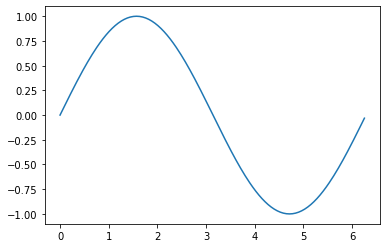

In [28]:
# Generate some data
x = np.array(range(200)) / 100 * np.pi
y = np.sin(x)

# Make a line plot
plt.plot(x, y)
# Show the plot
plt.show()

Of course, a line on its own is no good, you must label your axes! Luckily matplotlib makes this easy as well.

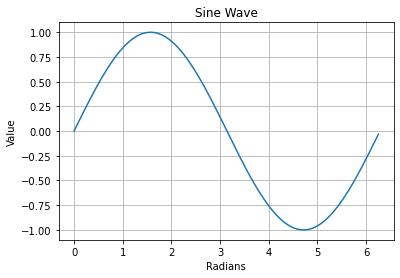

In [29]:
plt.plot(x, y)
# Turn on the grid
plt.grid()

# Add labels
plt.title("Sine Wave")
plt.xlabel("Radians")
plt.ylabel("Value")
plt.show()

You can plot multiple lines on the same figure by calling `plot()` multiple times. In this case if is usually helpful to add a legend too.

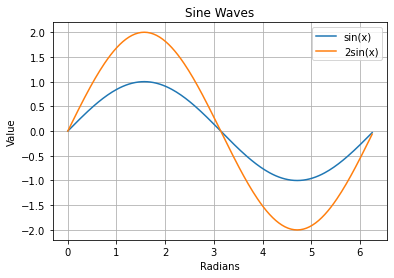

In [30]:
plt.plot(x, np.sin(x))
plt.plot(x, 2 * np.sin(x))

# Add legend
plt.legend(["sin(x)", "2sin(x)"])

plt.grid()
plt.title("Sine Waves")
plt.xlabel("Radians")
plt.ylabel("Value")
plt.show()

If you want your plots to be in separate figures, call `figure()` to reset the drawing environment and give a new window. Note we only call `plt.show()` once we're done setting up all of our figures.

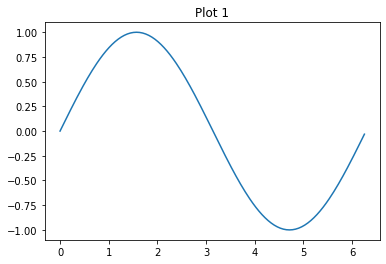

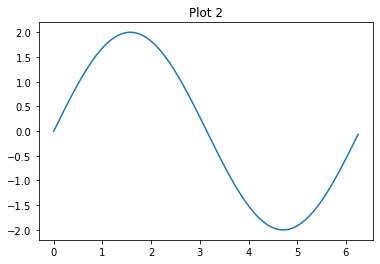

In [31]:
plt.plot(x, np.sin(x))
plt.title("Plot 1")

plt.figure()
plt.plot(x, 2 * np.sin(x))
plt.title("Plot 2")

plt.show()

### 2.2 Importing Data

Before we go further, let's go over some ways to import and export data from files. This isn't matplotlib specific, but we need to go over this before we start working with images.

Let's start with tabular data. The simplest format for tables is the CSV or comma separated value format. This lists one row of a table by line, with entries separated by commas. Normal Python has the [csv library](https://docs.python.org/3/library/csv.html) for reading and writing csv files. However, if we know the file contains numerical data, we can import directly into NumPy.

The data we're downloading is a CSV snapshot of data from the [TOP500 supercomputer list](https://www.top500.org/statistics/perfdevel/). It contains the number of floating point operations per second (FLOPS) that the number one supercomputer could perform for each year.

In [32]:
! curl https://gist.githubusercontent.com/AG6GR/b42536c4c9f3f34c7515d742b0ef87db/raw/3ede83bf17d4502fa73129b6f5e411202696b226/TOP500_Flops.csv -o TOP500_Flops.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   566  100   566    0     0   3985      0 --:--:-- --:--:-- --:--:--  3985


In [38]:
flops_data = np.loadtxt('TOP500_Flops.csv', dtype=int, skiprows=1, delimiter=',')
print(flops_data)

[[             1993      124000000000]
 [             1994      170000000000]
 [             1995      170000000000]
 [             1996      368000000000]
 [             1997     1300000000000]
 [             1998     1300000000000]
 [             1999     2400000000000]
 [             2000     4900000000000]
 [             2001     7200000000000]
 [             2002    35900000000000]
 [             2003    35900000000000]
 [             2004    70700000000000]
 [             2005   280600000000000]
 [             2006   280600000000000]
 [             2007   478200000000000]
 [             2008  1100000000000000]
 [             2009  1800000000000000]
 [             2010  2600000000000000]
 [             2011 10500000000000000]
 [             2012 17600000000000000]
 [             2013 33900000000000000]
 [             2014 33900000000000000]
 [             2015 33900000000000000]
 [             2016 93000000000000000]
 [             2017 93000000000000000]]


#### Exercise
Let's try plotting this data!

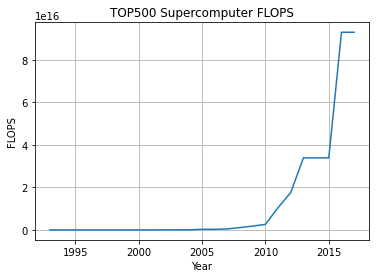

In [40]:
# WRITE CODE HERE
plt.plot(flops_data[:,0], flops_data[:,1])
plt.title("TOP500 Supercomputer FLOPS")
plt.xlabel("Year")
plt.ylabel("FLOPS")
plt.grid()
plt.show()

Bonus: Moore's Law famously predicts that the number of transistors in processors (and therefore computing power) would grow exponentially over time. Can you make a log plot of this data to show well reality matches Moore's Law?

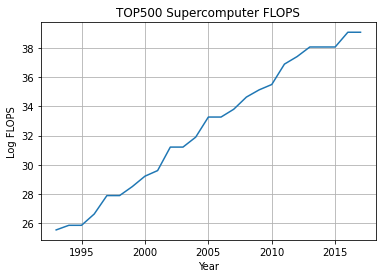

In [42]:
# WRITE CODE HERE
plt.plot(flops_data[:,0], np.log(flops_data[:,1]))
plt.title("TOP500 Supercomputer FLOPS")
plt.xlabel("Year")
plt.ylabel("Log FLOPS")
plt.grid()
plt.show()

### 2.3 Images

The next most common type of data we want to work with is image data. Matplotlib provides the `imshow` function to handle these. It supports plotting 2d arrays as grayscale images with coloring based on the value in the array and 3d RGB arrays as full color images.

First we need some image data to work with. We'll be fetching live satellite images from the [NOAA GOES West](https://www.star.nesdis.noaa.gov/GOES/fulldisk.php?sat=G17) geostationary weather satellite.

In [33]:
! curl https://cdn.star.nesdis.noaa.gov/GOES17/ABI/FD/GEOCOLOR/678x678.jpg     -o goes_west_small.jpg
! curl https://cdn.star.nesdis.noaa.gov/GOES17/ABI/FD/GEOCOLOR/10848x10848.jpg -o goes_west.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   98k  100   98k    0     0   682k      0 --:--:-- --:--:-- --:--:--  678k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 71.9M  100 71.9M    0     0   108M      0 --:--:-- --:--:-- --:--:--  108M


To read in the files, we can use the `imread` function from OpenCV. This returns a 3d ndarray. This is 3D because for each row, column pair we have a pixel with a 3 element color. So the shape is (width, height, 3). We'll go more into detail on how color works in the CV workshop.

#### Exercise
One small problem is that OpenCV is a bit of an odd package with many historical quirks due to the fact that it is based on an older C++ package. In particular, it presents its color data in BGR order rather than RGB order. So we need to flip the last dimension of the image in order for the colors to display right. Let's write a function to do this for us.

In [34]:
def bgr_to_rgb(image):
  # WRITE CODE HERE
  return image[:,:,::-1]

Now we can finally call imshow() to display this image. Note that the NOAA logo on the bottom left should be blue. If it isn't, double check your `bgr_to_rgb` function!

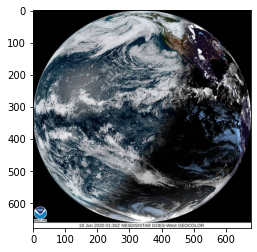

In [35]:
image = cv2.imread('goes_west_small.jpg')
plt.imshow(bgr_to_rgb(image))
plt.show()